# Saudi Arabia Used Cars  

**Febby Putri Milenia Piter**  

## Business Problem Understanding  
**Konteks dari Business Problem**  
Di pasar mobil bekas, banyak sekali mobil bekas yang tersedia. Untuk mendapatkan mobil yang reliable itu butuh pengetahuan yang mungkin tidak semua orang ketahui. Dengan pemodelan ini, pembeli dapat menggunakannya untuk membantu dirinya memilih mobil sesuai reliability yang dimiliki mobil. Reliability mobil mempengaruhi ketahan mobil itu untuk dapat digunakan.

**Problem Statement**  
Problem Statement: Memprediksi apakah mobil bekas yang ada dapat dihandalkan (Reliability) berdasarkan kriteria/fitur mobil.
- Mengapa masalah ini penting?: Informasi ini dapat membantu pembeli untuk mengetahui apakah mereka membeli mobil yang dapat dihandalkan, tahan lama, dan sesuai kriteria yang diinginkan. Untuk penjual mobil, pemodelan ini dapat digunakan untuk menentukan mobil yang dijual itu baik untuk dijual atau tidak sehingga kedepannya jika penjual ingin mengambil mobil bekas untuk dijual, dapat memilihnya dengan baik sesuai dengan kriteria/fitur yang diinginkan.
- Stakeholder: Pembeli mobil bekas, penjual mobil bekas.

**Tujuan**  
Membangun model machine learning yang dapat memprediksi mobil-mobil bekas yang terdapat pada dataset itu itu dapat dihandalkan atau tidak berdasarkan fitur-fitur yang dimilikinya seperti Year, Engine Size, dan Mileage yang dimiliki oleh mobil dengan tingkat akurasi minimal 80%.

**Analytic Approach**  
Menggunakan algoritma klasifikasi untuk memprediksi kehandalan mobil bekas yang dipilih termasuk kategori "Reliable","Unreliable","Moderate"

**Metric Evaluation**  
- Accuracy: Mengukur persentase prediksi yang benar dari keseluruhan prediksi.
- Precision: Mengukur seberapa banyak prediksi positif yang benar-benar positif.
- Recall: Mengukur seberapa banyak kasus positif yang benar dapat teridentifikasi.
- F1 Score: Harmonic mean dari Precision dan Recall.
- ROC AUC: Mengukur kinerja model dalam membedakan antara kelas yang positif dan negatif.

## Data Understanding
Dataset ini memiliki fitur-fitur berikut:

- Type: Jenis mobil bekas.
- Region: Region/wilayah tempat mobil bekas dijual.
- Make: Nama perusahaan.
- Gear_Type: Jenis transmisi mobil.
- Origin: Asal mobil.
- Options: Opsi mobil.
- Year: Tahun pembuatan.
- Engine_Size: Ukuran mesin mobil.
- Mileage: Jarak tempuh mobil.
- Negotiable: Apakah harga mobil dapat dinegosiasikan (True jika Price = 0, artinya dapat dinegosiasikan).
- Price: Harga mobil bekas.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle

# Balancing Dataset
from imblearn.over_sampling import SMOTE

# Warning
import warnings
warnings.filterwarnings('ignore')

/Users/febbypiter/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Understanding dan Explanatory Data Analysis (EDA)

In [2]:
# Baca file CSV dan simpan dalam variabel df_cars
df_cars = pd.read_csv('data_saudi_used_cars.csv')

In [4]:
# Menampilkan isi DataFrame
df_cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [5]:
# Mendapatkan informasi tentang DataFrame
print("Data Information:")
df_cars.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [6]:
# Menghasilkan statistik deskriptif dari DataFrame
print("Summary Statistics:")
df_cars.describe()

Summary Statistics:


,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


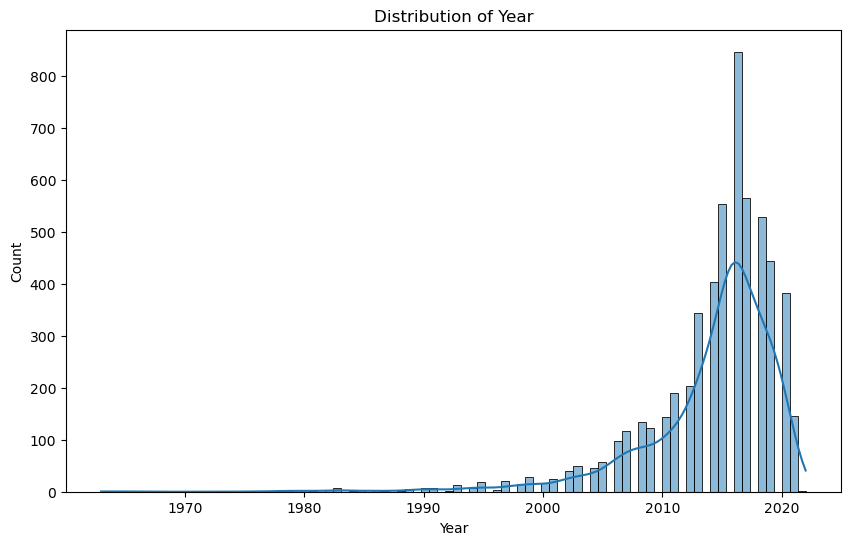

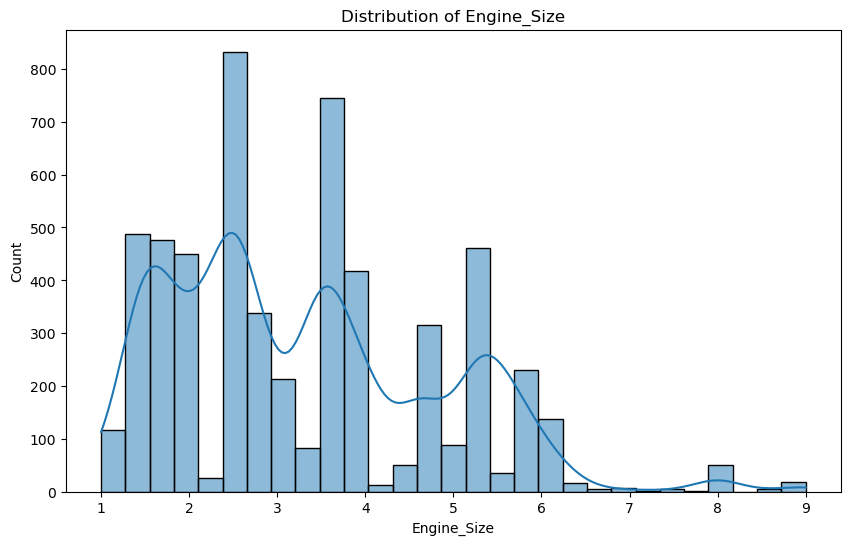

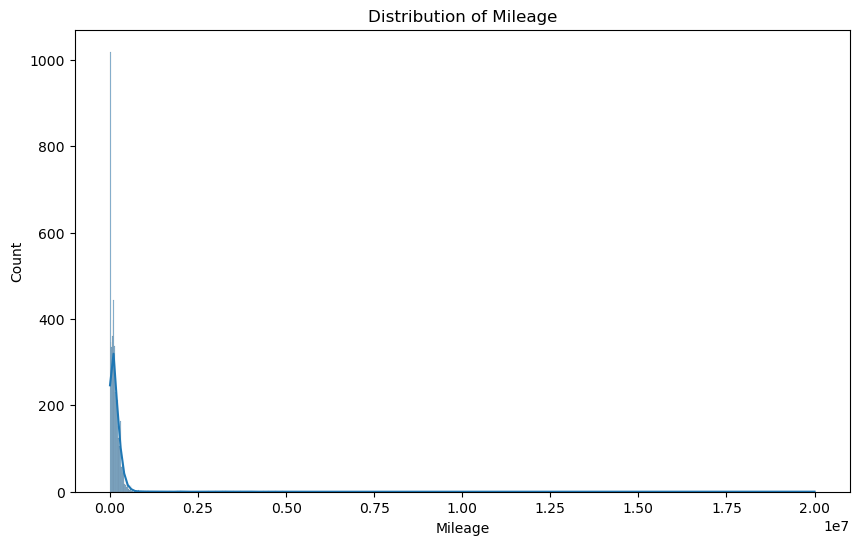

In [7]:
# Visualizing distributions of numerical features
numerical_features = ['Year', 'Engine_Size', 'Mileage']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cars[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

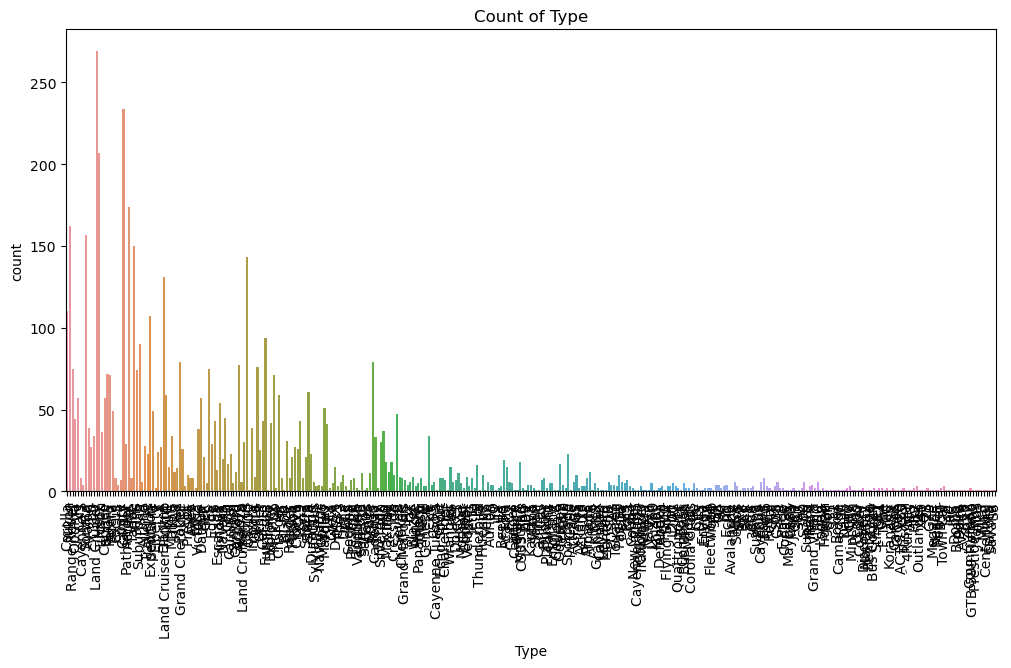

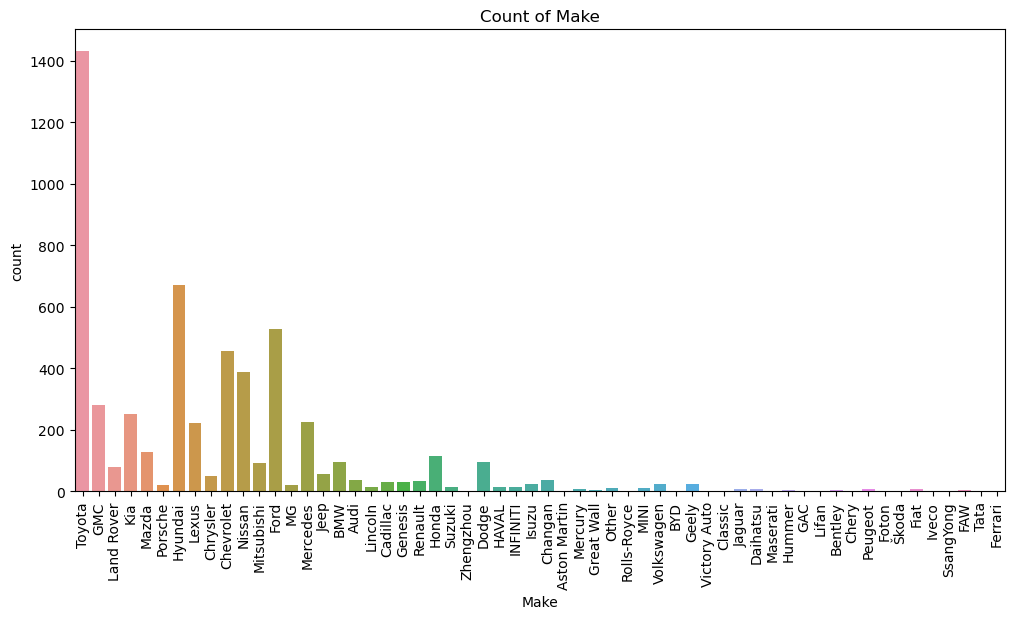

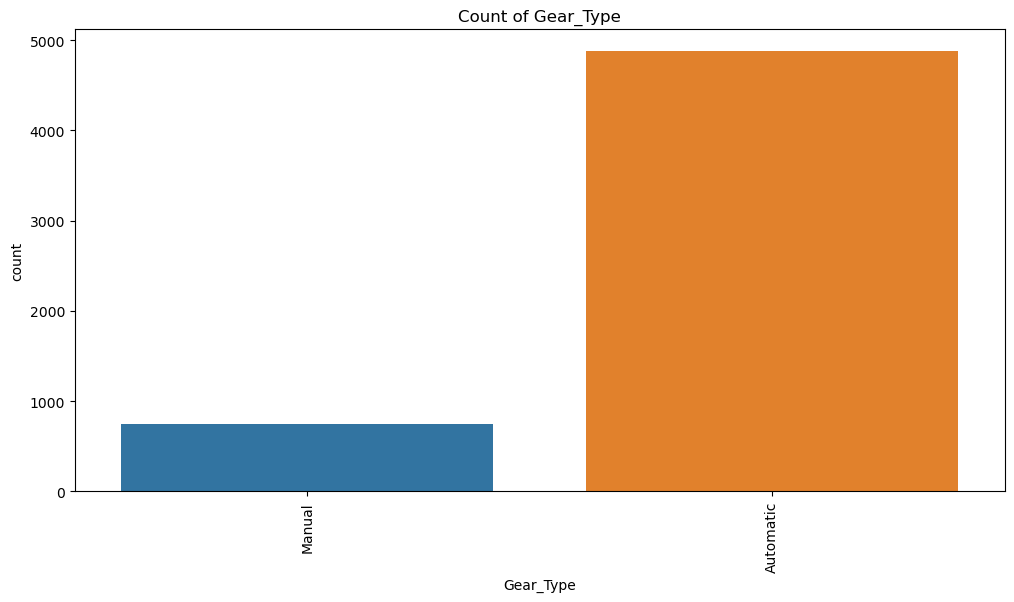

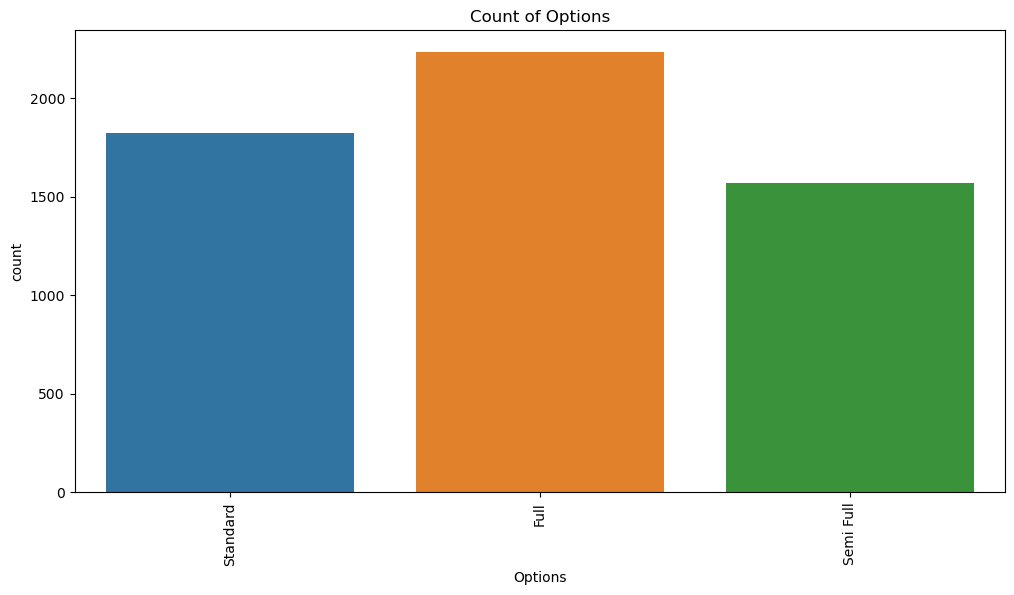

In [8]:
# Visualizing categorical features
categorical_features = ['Type', 'Make', 'Gear_Type', 'Options']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_cars, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
    plt.show()

# Data Cleaning dan Preprocessing

In [9]:
# Check missing values
print("Missing Values:")
print(df_cars.isnull().sum())

Missing Values:
Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64


Tidak dilakukan handling missing value karena tidak ada data yang kosong/hilang pada dataset ini.

In [10]:
# Check duplicate rows
print("Duplicate Rows:")
print(df_cars.duplicated().sum())

Duplicate Rows:
4


In [11]:
df_cars[df_cars.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


Terdapat 4 row data yang memiliki Gear_Type, Origin yang sama tetapi memiliki banyak value kolom lainnya yang berbeda yang membuat keempat row tersebut berbeda, seperti Type (tipe mobil), Region (lokasi mobil), Make (merk mobil), dan lain-lain, sehingga duplikasi data ini tidak perlu ditangani karena semua rows pada dataset relevan dan saling berbeda untuk pemodelan data.

### Definisi Kriteria Kehandalan (Reliability)
Kriteria kehandalan ditetapkan berdasarkan faktor-faktor umum yang mempengaruhi kehandalan mobil bekas seperti tahun produksi, jarak tempuh, dan ukuran mesin.  
Faktor-faktor ini dipilih karena:
- `Year` (Tahun): Mobil yang lebih baru biasanya lebih dapat diandalkan karena komponen dan teknologi yang lebih modern serta lebih sedikit kerusakan (aus).
- `Mileage` (Jarak Tempuh): Mobil dengan jarak tempuh rendah biasanya lebih dapat diandalkan karena komponen mekanisnya belum banyak digunakan.
- `Engine_Size` (Ukuran Mesin): Ukuran mesin dapat mempengaruhi kehandalan, namun dalam banyak kasus, usia dan jarak tempuh lebih kritikal.

In [12]:
# Definisikan kriteria kehandalan
def determine_reliability(row):
    if row['Year'] >= 2019 and row['Mileage'] < 50000:
        return "Reliable"
    elif 2014 <= row['Year'] < 2019 or 50000 <= row['Mileage'] < 100000:
        return "Moderate"
    else:
        return "Unreliable"

In [13]:
# Terapkan kriteria ke dataset
df_cars['Reliability'] = df_cars.apply(determine_reliability, axis=1)

In [14]:
# Tampilkan hasil
print(df_cars['Reliability'].value_counts())

Reliability
Moderate      3251
Unreliable    1724
Reliable       649
Name: count, dtype: int64


In [14]:
# Simpan dataset yang sudah ditambahkan kolom Reliability
df_cars.to_csv('data_saudi_used_cars_reliability.csv', index=False)

In [15]:
# Hasil setelah diterapkan kriteria pada dataset
df_cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Reliability
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0,Unreliable
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000,Moderate
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000,Moderate
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000,Moderate
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0,Reliable


In [16]:
# Encoding categorical features
le = LabelEncoder()
for feature in categorical_features:
    df_cars[feature] = le.fit_transform(df_cars[feature])

In [17]:
# Encoding the target variable 'Reliability'
df_cars['Reliability'] = le.fit_transform(df_cars['Reliability'])

Encoding 
0 = Moderate  
1 = Reliable  
2 = Unreliable

In [18]:
df_cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price,Reliability
0,98,Abha,53,1,Saudi,2,2013,1.4,421000,True,0,2
1,340,Riyadh,19,0,Saudi,0,2014,8.0,80000,False,120000,0
2,262,Riyadh,33,0,Gulf Arabic,0,2015,5.0,140000,False,260000,0
3,231,Hafar Al-Batin,32,0,Saudi,1,2015,2.4,220000,False,42000,0
4,142,Riyadh,53,0,Saudi,0,2020,4.0,49000,True,0,1


### Feature Engineering

In [19]:
# Menentukan fitur dan label
features = ['Year', 'Engine_Size', 'Mileage']
X = df_cars[features]
y = df_cars['Reliability']

## Outliers

### Deteksi Outliers

In [20]:
# Mendeteksi Outliers menggunakan metode IQR
def detect_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

outliers = detect_outliers(df_cars, features)
for feature in outliers:
    print(f"\n\nOutliers for {feature}:\n{outliers[feature]}")



Outliers for Year:
      Type     Region  Make  Gear_Type       Origin  Options  Year  \
9      194      Aseer    34          0        Saudi        0  1998   
15     197      Aseer    53          1  Gulf Arabic        1  1982   
16     197    Al-Baha    53          1        Saudi        1  1985   
19      74     Riyadh     8          0        Other        2  1983   
28     239    Al-Ahsa    44          0        Saudi        1  2002   
...    ...        ...   ...        ...          ...      ...   ...   
5521   293  Al-Medina     8          0        Other        1  1997   
5537   279     Jeddah    19          0        Other        0  1999   
5553   285     Jeddah    19          1        Saudi        1  1981   
5599    98     Dammam    53          1        Other        2  1997   
5610   313     Jeddah    36          0        Other        0  1999   

      Engine_Size  Mileage  Negotiable  Price  Reliability  
9             4.6      300        True      0            2  
15            4.

### Mengatasi Outliers
#### Menghapus Outliers

**Mengatasi Outliers dengan Menghapusnya**  
- Metode ini pertama-tama mengidentifikasi data yang dianggap outliers menggunakan batas bawah dan atas yang ditentukan oleh Interquartile Range (IQR).
- Data yang teridentifikasi sebagai outliers kemudian dihapus dari dataset. Hal ini mengurangi jumlah data yang digunakan untuk pelatihan model.
- Menghapus outliers dapat menghilangkan pengaruh negatif yang mungkin diberikan oleh nilai-nilai ekstrem pada model statistik atau machine learning.

In [21]:
# Mengatasi Outliers dengan menghapusnya
def remove_outliers(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
    return df_cleaned

In [23]:
# Menghapus outliers dari dataset
df_cars_cleaned = remove_outliers(df_cars, features)

In [24]:
# Menentukan fitur dan label dari dataset yang sudah dibersihkan
X_cleaned = df_cars_cleaned[features]
y_cleaned = df_cars_cleaned['Reliability']

In [25]:
# Splitting the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [26]:
# Standarisasi numerical features pada data yang sudah dibersihkan
scaler = StandardScaler()
X_train_cleaned[features] = scaler.fit_transform(X_train_cleaned[features])
X_test_cleaned[features] = scaler.transform(X_test_cleaned[features])

# Modeling dan Evaluation

In [27]:
# Balancing the training set using SMOTE pada data yang sudah dibersihkan
smote = SMOTE(random_state=42)
X_train_balanced_cleaned, y_train_balanced_cleaned = smote.fit_resample(X_train_cleaned, y_train_cleaned)


In [28]:
# Initializing models
models = {
    'SVC': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [29]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [30]:
# Dictionary to store model performance
model_performance_cleaned = {
    'Without SMOTE': {},
    'With SMOTE': {}
}

In [31]:
# Evaluate models without SMOTE pada data yang sudah dibersihkan
print("\nEvaluating models without SMOTE (cleaned data):")
for model_name, model in models.items():
    model.fit(X_train_cleaned, y_train_cleaned)
    performance = evaluate_model(model, X_test_cleaned, y_test_cleaned)
    model_performance_cleaned['Without SMOTE'][model_name] = performance
    print(f"\n{model_name} Model")
    print(f"Accuracy: {performance[0]}, Precision: {performance[1]}, Recall: {performance[2]}, F1-Score: {performance[3]}")

# Evaluate models with SMOTE pada data yang sudah dibersihkan
print("\nEvaluating models with SMOTE (cleaned data):")
for model_name, model in models.items():
    model.fit(X_train_balanced_cleaned, y_train_balanced_cleaned)
    performance = evaluate_model(model, X_test_cleaned, y_test_cleaned)
    model_performance_cleaned['With SMOTE'][model_name] = performance
    print(f"\n{model_name} Model")
    print(f"Accuracy: {performance[0]}, Precision: {performance[1]}, Recall: {performance[2]}, F1-Score: {performance[3]}")


Evaluating models without SMOTE (cleaned data):

SVC Model
Accuracy: 0.9646609360076409, Precision: 0.9646434559604556, Recall: 0.9646609360076409, F1-Score: 0.9646282233940268

Logistic Regression Model
Accuracy: 0.9293218720152817, Precision: 0.9298446439836273, Recall: 0.9293218720152817, F1-Score: 0.9290626538858708

Evaluating models with SMOTE (cleaned data):

SVC Model
Accuracy: 0.9484240687679083, Precision: 0.9554027653212729, Recall: 0.9484240687679083, F1-Score: 0.9493508503592254

Logistic Regression Model
Accuracy: 0.9350525310410697, Precision: 0.9431633333647523, Recall: 0.9350525310410697, F1-Score: 0.9359102421847866


In [35]:
# Determine the best model based on F1-Score
best_model_cleaned_without_smote = max(model_performance_cleaned['Without SMOTE'], key=lambda k: model_performance_cleaned['Without SMOTE'][k][3])
best_model_cleaned_with_smote = max(model_performance_cleaned['With SMOTE'], key=lambda k: model_performance_cleaned['With SMOTE'][k][3])

print("\nBest Model on Cleaned Data Without SMOTE:", best_model_cleaned_without_smote)
print(f"Accuracy: {model_performance_cleaned['Without SMOTE'][best_model_cleaned_without_smote][0]}, F1-Score: {model_performance_cleaned['Without SMOTE'][best_model_cleaned_without_smote][3]}")
print("\nBest Model on Cleaned Data With SMOTE:", best_model_cleaned_with_smote)
print(f"Accuracy: {model_performance_cleaned['With SMOTE'][best_model_cleaned_with_smote][0]}, F1-Score: {model_performance_cleaned['With SMOTE'][best_model_cleaned_with_smote][3]}")


Best Model on Cleaned Data Without SMOTE: SVC
Accuracy: 0.9646609360076409, F1-Score: 0.9646282233940268

Best Model on Cleaned Data With SMOTE: SVC
Accuracy: 0.9484240687679083, F1-Score: 0.9493508503592254


Pemodelan menggunakan SMOTE tidak memberi pengaruh besar terhadap hasil evaluasi, bahkan pemodelan yang tidak menggunakan SMOTE memiliki nilai yang sedikit lebih tinggi dibandingkan menggunakan SMOTE. Maka model yang akan digunakan pada business problem ini yaitu Model SVC without SMOTE yang telah diatasi outliersnya. Hasil accuracy dan f1-score pemodelannya dapat dilihat di atas.

In [36]:
# Save best model dengan pickle
best_svc_model = models['SVC']
best_svc_model.fit(X_train_cleaned, y_train_cleaned)

with open('best_svc_model.pkl', 'wb') as file:
    pickle.dump(best_svc_model, file)

# Kesimpulan
Dari analisis yang dilakukan dalam notebook, berikut adalah poin-poin penting yang ditemukan:

1. Faktor-Faktor yang Mempengaruhi Kehandalan Mobil Bekas:
- Fitur-fitur seperti Type, Make, Gear_Type, Year, Engine_Size, dan Mileage telah digunakan untuk memprediksi kehandalan mobil bekas.
2. Metode Klasifikasi:
- Beberapa model klasifikasi diuji, termasuk Support Vector Classifier (SVC), Logistic Regression.
3. Preprocessing dan Penanganan Ketidakseimbangan Data:
- Data telah dibersihkan dan diatasi masalah outliers. Teknik SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menangani ketidakseimbangan kelas.
4. Model Terbaik:
- Model SVC tanpa penggunaan SMOTE memiliki kinerja terbaik dengan nilai accuracy dan f1-score yang tinggi, masing-masing sebesar 96.47% dan 96.46%.
5. Encoding Target:
- Kehandalan mobil dikategorikan menjadi tiga kelas: "Moderate" (0), "Reliable" (1), dan "Unreliable" (2).  

# Rekomendasi
1. Pemilihan Model:
- Berdasarkan evaluasi, disarankan untuk menggunakan model SVC tanpa SMOTE untuk prediksi kehandalan mobil bekas. Model ini menunjukkan kinerja yang lebih baik dibandingkan dengan model lainnya.
2. Penerapan di Dunia Nyata:
- Model ini dapat digunakan oleh dealer mobil atau platform penjualan mobil untuk memberikan informasi mengenai kehandalan mobil kepada calon pembeli. Hal ini dapat meningkatkan kepercayaan pembeli dan memudahkan proses pengambilan keputusan.
3. Pengembangan Lebih Lanjut:
- Meskipun model SVC memberikan hasil yang baik, disarankan untuk terus memonitor dan memperbarui model dengan data terbaru. Perbaikan dapat dilakukan dengan mencoba model lain atau melakukan feature engineering lebih lanjut.
4. Penggunaan Fitur Lain:
- Fitur tambahan seperti sejarah perbaikan, jumlah pemilik sebelumnya, dan kondisi fisik mobil dapat dieksplorasi untuk meningkatkan akurasi model.  


Dengan mempertimbangkan hasil dan rekomendasi di atas, analisis ini dapat membantu dalam memahami dan memprediksi kehandalan mobil bekas di pasar Saudi Arabia.